<a href="https://colab.research.google.com/github/CodeWithSridhar/TSF-GRIP-Internship/blob/main/Task2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

From the given "Iris" dataset, predict the optimum nuber of clusters

Use R or Python to perform the task

Dataset: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
data= pd.read_csv('https://raw.githubusercontent.com/CodeWithSridhar/Internship_The-Sparks-Foundation/main/Iris.csv')

In [22]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [25]:
data.isnull().sum().to_frame('Null_values')

,Null_values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [26]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
data.shape

(150, 6)

In [28]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [29]:
del data['Id']

In [30]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data visualization

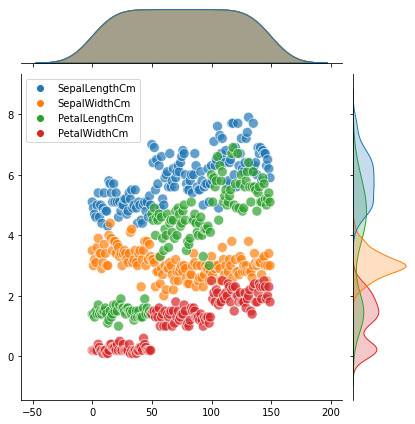

In [31]:
sns.jointplot(data=data, s=100, alpha=0.7, height=6)
plt.show()

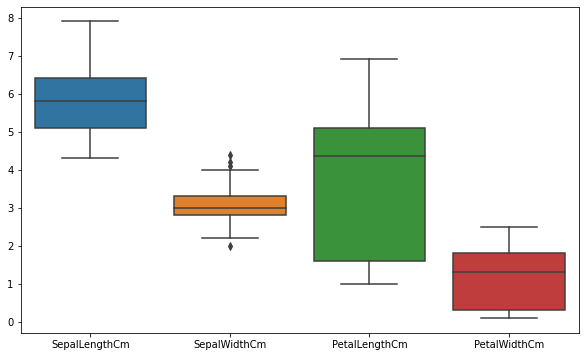

In [32]:
# Distribution of data using Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()

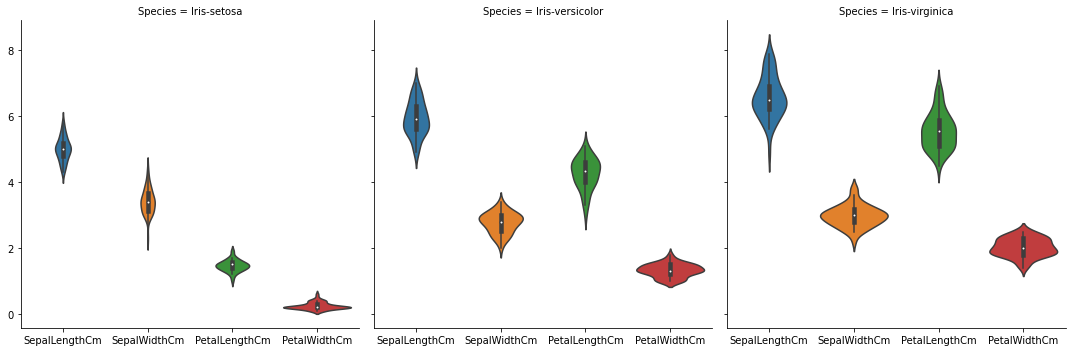

In [36]:
# Plotting by Species using Catplot
sns.catplot(data=data, col='Species', kind='violin')
plt.show()

In [37]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


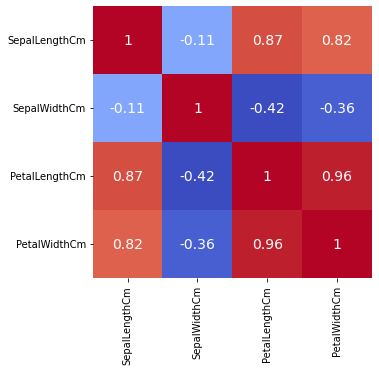

In [39]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, 
            cbar=False, annot_kws={'size': 14})
plt.show()

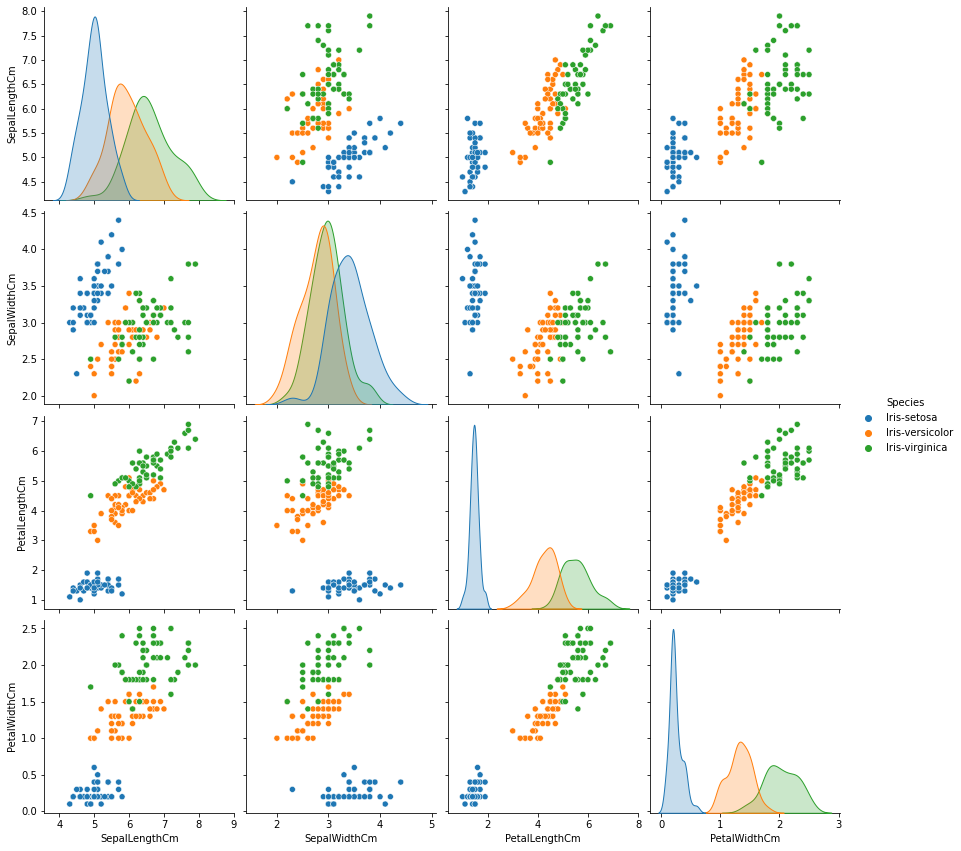

In [41]:
# plotting pairplot
sns.pairplot(data=data, hue='Species', height=3)
plt.show()

#K-means Clustering

In [43]:
from sklearn.cluster import KMeans

In [44]:
# Petal-Length & Petal-Width are taken
X = data.iloc[:, [2,3]].values
y = data['Species'].map({'Iris-setosa': 0, 'Iris-virginica':1, 'Iris-versicolor':2}).values

In [45]:
X.shape

(150, 2)

In [46]:
y.shape

(150,)

In [47]:
# finding the number of clusters

wcss = []
for i in range(1,11):
    kmeans_c = KMeans(n_clusters=i, init='k-means++', 
                      max_iter = 300, n_init = 10, random_state=0)
    kmeans_c.fit(X)
    wcss.append(kmeans_c.inertia_)
    print(f'wcss {i}: {kmeans_c.inertia_}')

wcss 1: 550.6434666666667
wcss 2: 86.40394533571003
wcss 3: 31.38775897435898
wcss 4: 19.48238901098901
wcss 5: 13.933308757908758
wcss 6: 11.089786452241711
wcss 7: 9.337790756302523
wcss 8: 7.631802244955953
wcss 9: 6.472894541406307
wcss 10: 5.5542093364152185


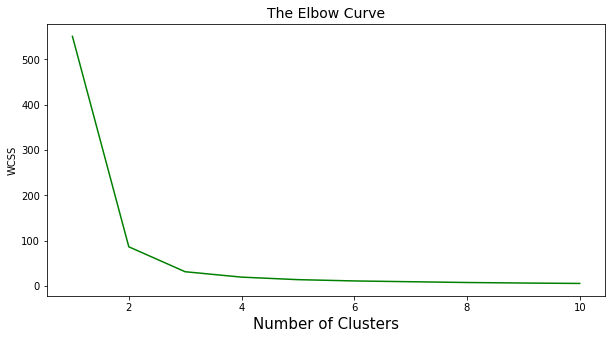

In [48]:
# Plotting Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss, color='green')
plt.title('The Elbow Curve', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('WCSS')
plt.show()

Making Predictions

In [49]:
kmeans = KMeans(n_clusters=3, init='k-means++', 
                max_iter = 300, n_init = 10, random_state=0)
y_means = kmeans.fit_predict(X)
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [50]:
# Cluster Center values
kmeans.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [52]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

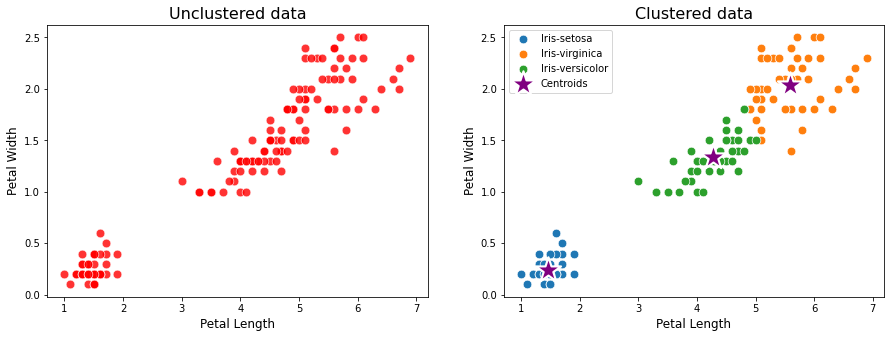

In [54]:
Species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Unclustered data', fontsize=16)
ax[0].set_xlabel('Petal Length', fontsize=12)
ax[0].set_ylabel('Petal Width', fontsize=12)
sns.scatterplot(data['PetalLengthCm'], data['PetalWidthCm'], 
                s=75, color='red', alpha=0.8, ax=ax[0])
ax[1].set_title('Clustered data', fontsize=16)
ax[1].set_xlabel('Petal Length', fontsize=12)
ax[1].set_ylabel('Petal Width', fontsize=12)
for i in range(0, 3):
    sns.scatterplot(X[y_means == i, 0], X[y_means == i, 1], s=75, label=Species[i], ax=ax[1])
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                s=700, color='purple', label='Centroids', marker='*', ax=ax[1])